# Tutorial 2 - scientific Python ecosystem: `pandas` and `GeoPandas`

In this tutorial we will learn using 

 1. `pandas` DataFrames
 2. `GeoPandas` GeoDataFrames

within PyGMT

## 0. General stuff

Import required packages

In [10]:
import geopandas as gpd
import numpy as np
import pandas as pd
import pygmt

## 1. `pandas`

### 1.1 Data

`pandas.DataFrame`

### 1.2 Create what ever plot

xxx

## 2. `GeoPandas`

Different datasets are available from: https://github.com/GenericMappingTools/pygmt/issues/2786#issuecomment-1787655589

### 2.1 Line geometry

Examples: rivers, roads, boundaries

#### 2.1.1 Data

We download data into in GeoPandas GeoDataFrame.
More interesting data sets can be found at: 

In [2]:
gpd_rivers_org = gpd.read_file(
    "https://www.eea.europa.eu/data-and-maps/data/wise-large-rivers-and-large-lakes/" + \
    "zipped-shapefile-with-wise-large-rivers-vector-line/zipped-shapefile-with-wise-large-rivers-vector-line/" + \
    "at_download/file/wise_large_rivers.zip"
)
gpd_rivers_org.head()

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((4185683.29 2775788.04, 41861..."
1,Douro,8.162452e+05,"MULTILINESTRING ((2764963.81 2199037.624, 2766..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((3178371.814 2315100.781, 317..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((4235352.373 3422319.986, 423..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((2859329.283 1682737.074, 286..."


Convert to coordinate system / reference system

In [3]:
gpd_rivers_org.crs
gpd_rivers = gpd_rivers_org.to_crs('EPSG:4326')
gpd_rivers.head()

,NAME,Shape_Leng,geometry
0,Danube,2.770357e+06,"MULTILINESTRING ((8.1846 48.0807, 8.19049 48.0..."
1,Douro,8.162452e+05,"MULTILINESTRING ((-8.67141 41.14934, -8.64362 ..."
2,Ebro,8.269909e+05,"MULTILINESTRING ((-4.05971 42.97715, -4.06841 ..."
3,Elbe,1.087288e+06,"MULTILINESTRING ((8.69715 53.90109, 8.72716 53..."
4,Guadalquivir,5.997583e+05,"MULTILINESTRING ((-6.37899 36.80363, -6.34806 ..."


#### 2.1.2 Create a histogram for the distribution of the river length.

xxx

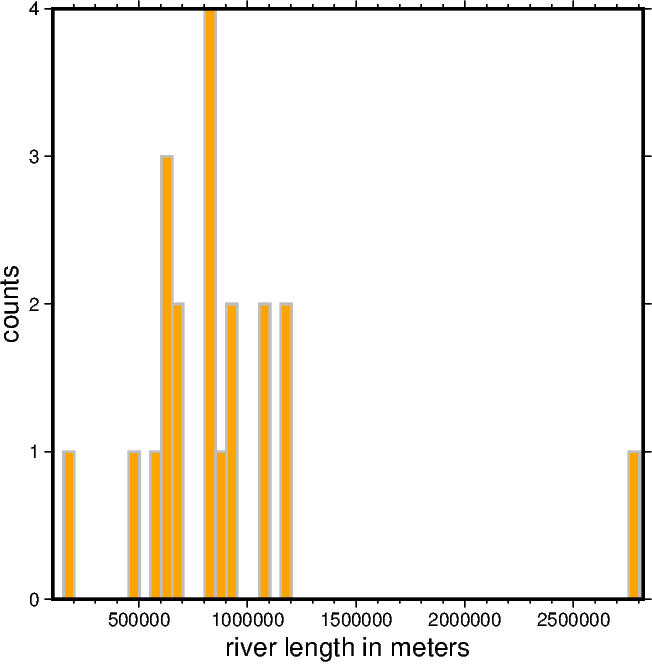

In [4]:
# Choose the bin width of the bars; feel free to play around with this value
len_min = gpd_rivers.Shape_Leng.min()
len_max = gpd_rivers.Shape_Leng.max()
step_histo = 50000

fig = pygmt.Figure()

fig.histogram(
    data=np.array(gpd_rivers["Shape_Leng"]),
    projection="X10c",
    # Determine y range automatically
    region=[len_min - step_histo, len_max + step_histo, 0, 0],
    # Define the frame, add labels to the x-axis and y-axis
    frame=["WSne", "x+lriver length in meters", "y+lcounts"],
    # Generate evenly spaced bins
    series=step_histo,
    # Fill bars with color "orange"
    fill="orange",
    # Draw gray outlines with a width of 1 point
    pen="1p,gray",
    # Choose histogram type 0, i.e., counts [Default]
    histtype=0,
)

fig.show(dpi=150)

#### 2.1.3 Create a map of the rivers

xxx

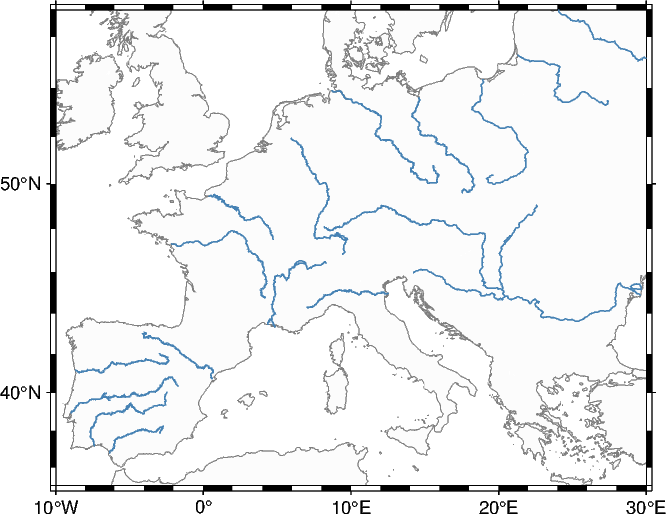

In [5]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 30, 35, 57],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)

fig.plot(data=gpd_rivers, pen="0.5p,steelblue,solid")

fig.show(dpi=150)

#### 2.1.4 Filter the dataset based on the river length and plot the subsets differently

xxx

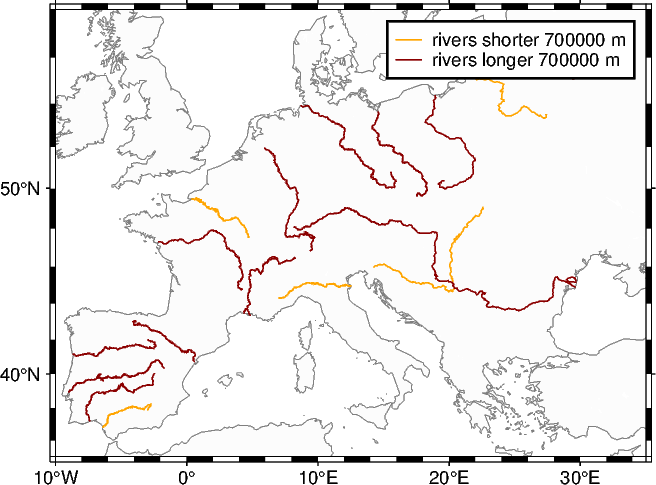

In [6]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 35, 35, 58],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=True,
)

# Split the dataset in two subsets of shorter and longer rivers
# Feel free to play around with this value
len_limit = 700000  # in meters
gpd_rivers_short = gpd_rivers[gpd_rivers["Shape_Leng"] < len_limit]
gpd_rivers_long = gpd_rivers[gpd_rivers["Shape_Leng"] > len_limit]

fig.plot(data=gpd_rivers_short, pen="0.5p,orange", label=f"rivers shorter {len_limit} m")
fig.plot(data=gpd_rivers_long, pen="0.5p,darkred", label=f"rivers longer {len_limit} m")

fig.legend()

fig.show(dpi=150)

#### 2.1.5 Addional task: Plot the rivers with color-coding for the river length

xxx

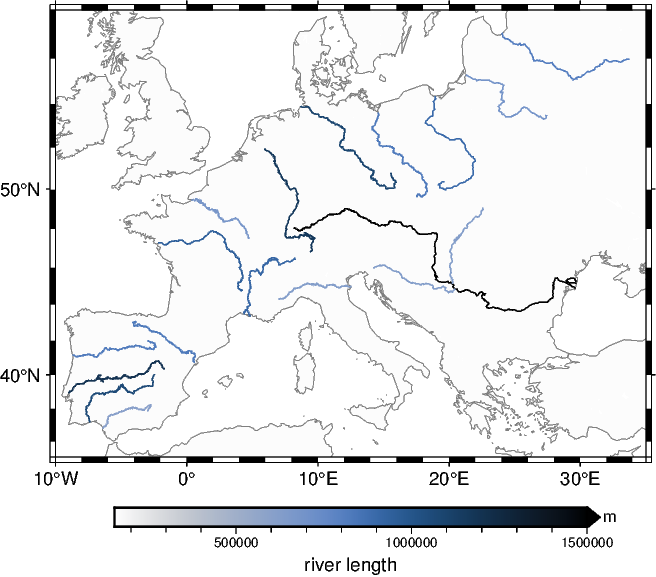

In [7]:
fig = pygmt.Figure()

fig.coast(
    projection="M10c", 
    region=[-10, 35, 35, 58],
    land="gray99",
    shorelines="1/0.01p,gray50",
    frame=True,
)

pygmt.makecpt(cmap="oslo", series=[len_min, 1500000], reverse=True)
fig.colorbar(frame=["x+lriver length", "y+lm"], position="+ef0.2c")

for i_river in range(len(gpd_rivers)):
    fig.plot(
        data=gpd_rivers[gpd_rivers.index==i_river],
        zvalue=gpd_rivers.loc[i_river, "Shape_Leng"],
        pen="0.5p",
        cmap=True,
    )

fig.show(dpi=150)

### 2.2 Polygon geometry

Used in / ideas of this example
* plot with fill="+z" and aspatial parameter
* choropleth map: maybe higher-level method see PR https://github.com/GenericMappingTools/pygmt/pull/2798
* Data stored in geopandas GeoDataFrame
* built-in data of geopandas: deprecated see issue https://github.com/GenericMappingTools/pygmt/issues/2786

#### 2.2.1 Data

In [8]:
gdf_airbnb = gpd.read_file("https://geodacenter.github.io/data-and-lab//data/airbnb.zip")
gdf_airbnb.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017..."
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165..."
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


#### 2.2.2 Creat a choropleth map

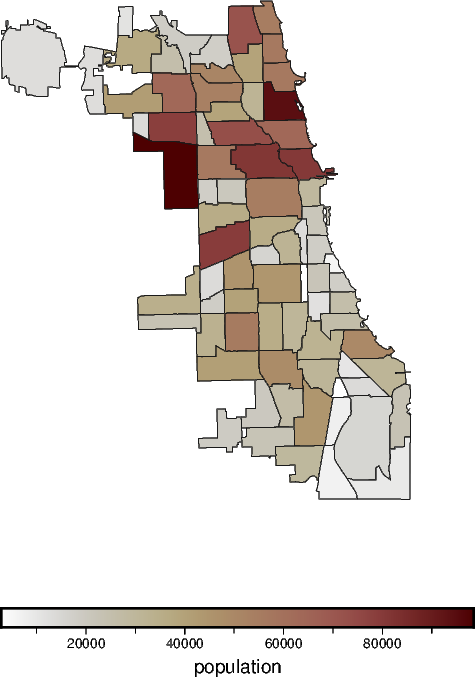

In [9]:
fig = pygmt.Figure()
fig.basemap(region=[-88, -87.4, 41.6, 42.05], projection="M10c", frame="rltb")

# Set up colormap
popul_min = np.min(gdf_airbnb["population"])
popul_max = np.max(gdf_airbnb["population"])
pygmt.makecpt(cmap="bilbao", series=[popul_min, popul_max, 10])
# Add colorbar
fig.colorbar(frame="x+lpopulation")

# Plot the polygons with color-coding for the population
fig.plot(
    data=gdf_airbnb, 
    pen="0.2p,gray10", 
    fill="+z", 
    cmap=True,
    aspatial="Z=population",
)

fig.show(dpi=150)

### 3. Additional tasks and comments

Some interesting aspects:

- Convert other objects to `pandas` or `GeoPandas` objects to make them usable in PyGMT
- Combination with `shapely` to create more complex geometries (i.e. `from shapely.geometry import Polygon`)
- Use sutiable colormaps (F. Crameri publication)
- Use similarly with DataFrames from xyz  

### 4. References



- xyz